# Scenario: Stolen phones in a nightclub

Your friend owns a nightclub, and the nightclub is suffering an epidemic of stolen phones. At least one thief has been frequenting her club and stealing her visitors' phones.

Her club has a licence scanner at its entrance, that records the name and date-of-birth of everyone who enters the club - so she should have the personal details of the thief or thieves; it's just mixed in with the details of her honest customers. 
She heard you call yourself a "data scientist", so has asked you to come up with a ranked list of up to 20 suspects to give to the police.

She's given you:
`visitor_log.csv` - details of who visited the club and on what day (those visiting 2AM Tuesday are counted as visiting on Monday).
`theft_log.csv` - a list of days on which thefts were reported to occur (again, thefts after midnight are counted as the previous day - we're being nice to you)

She wants from you:
- A list of ID details for the 20 most suspicious patrons, ranked from most-suspicious to least-suspicious.
- If you think there are fewer than 20 thieves, a list of ID details for everyone that you think is a thief.




In [1]:
import pandas as pd

df_all = pd.read_csv('visitor_log.csv')

df_all.head()

,visit_date,name,dob
0,2016-06-16,Samuel Casanova,1990-03-12
1,2016-06-16,Gerald Orozco,1990-10-05
2,2016-06-16,Sharon Davis,1990-10-18
3,2016-06-16,Spencer Spencer,1991-10-13
4,2016-06-16,Steven Estevez,1992-01-13


In [2]:
df_theft = pd.read_csv('theft_log.csv', header=None)

df_theft.rename(index=str, columns={0: "date"}, inplace =True)

df_theft.head()

,date
0,2017-01-01
1,2016-12-30
2,2016-12-25
3,2016-12-22
4,2016-12-19


In [3]:
df_theft.dtypes

date    object
dtype: object

In [4]:
df_all.dtypes

visit_date    object
name          object
dob           object
dtype: object

In [5]:
import numpy as np

#select from df_all common in df_theft

df_all['was_present'] = df_all.visit_date.isin(df_theft.date).astype(np.int8)

In [6]:
df_present = df_all[df_all['was_present']>0]

df_present.head()

,visit_date,name,dob,was_present
227,2016-06-17,Samuel Casanova,1990-03-12,1
228,2016-06-17,Lauryn George,1991-10-17,1
229,2016-06-17,Sherry Wilder,1992-04-26,1
230,2016-06-17,Frances Bateman,1992-05-06,1
231,2016-06-17,Darrell Wilson,1993-01-19,1


In [7]:
len(df_present)

7288

In [8]:
df_suspects = df_present.groupby(['name', 'dob']).nunique()

df_suspects.head()

,,visit_date,name,dob,was_present
name,dob,,,,
Aaron Nelson,1994-12-12,11,1,1,1
Ada Tejeda,1997-05-24,22,1,1,1
Adam Berry,1995-11-02,5,1,1,1
Adam Dorsette,1996-12-07,4,1,1,1
Adam Johnson,1996-04-11,13,1,1,1


In [9]:
df_suspects2 = df_present.groupby(['name', 'dob'], as_index=False)['visit_date'].count()
df_suspects2.head()

,name,dob,visit_date
0,Aaron Nelson,1994-12-12,11
1,Ada Tejeda,1997-05-24,22
2,Adam Berry,1995-11-02,5
3,Adam Dorsette,1996-12-07,4
4,Adam Johnson,1996-04-11,13


In [10]:
df_suspects2['visit_date'].sum()

7288

In [63]:
#sort the data frame
df_suspects2.rename(index=str, columns={'visit_date': 'visit_freq'}, inplace =True)

df_suspects2 = df_suspects2.sort_values(by=['visit_freq'], ascending=False)
#obtain ranked top 20 suspects 
df_suspects2.head(20)

,name,dob,visit_freq
463,Karen Keeney,1993-12-25,30
454,Judith Sanders,1993-08-26,27
678,Patricia Whitley,1993-06-08,27
562,Lynn Bernhart,1995-11-13,27
301,Henry Brunson,1996-06-21,27
117,Christine Victoria,1996-11-26,27
151,Daniel Laster,1995-12-31,26
743,Roger Ballance,1996-05-16,26
47,Arthur Freund,1996-09-07,26
144,Dale Kirkwood,1993-05-22,26


In [67]:
#save suspect list to csv
suspect_list= df_suspects2.head(20)
suspect_list.to_csv(r'Top_20_suspects.csv')

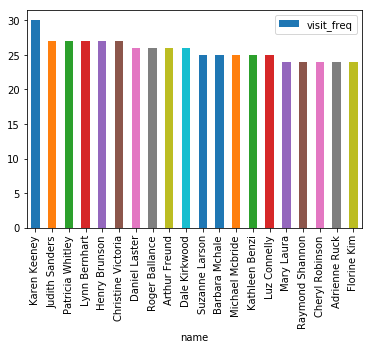

In [65]:
#Basic Plot to view the suspect visit distribution
import matplotlib.pyplot as plt
suspect_list.plot(kind='bar', x='name', y='visit_freq', rot = 90)

# Interactive Visualization of Suspects  Visit Distribution on Theft Days
NB: Display might not work in HTML. 

In [66]:
from plotly.graph_objs import *
import plotly.graph_objs as go

data = [go.Bar(
            x= suspect_list['name'],
            y= suspect_list['visit_freq']
    )]


plotly.offline.iplot(data, filename='basic-bar')